# montecarlosimulator

## Metadata

1. Final Project for DS 5100
2. 12/01/22
3. Tom Lever
4. tsl2b
5. https://github.com/tslever/montecarlosimulator/blob/main/final-project-submission.ipynb
6. https://github.com/tslever/montecarlosimulator

## The Monte Carlo Module

In [1]:
'''
Module for classes Die, which may be rolled to select a face;
Game, which plays by rolling one or more times all dice in a list of one or more dice with the same set of faces; and
Analyzer, which generates structures of descriptive statistics for a game that has been played
'''

import numpy as np
import pandas as pd

class Die:
    '''
    May be rolled to select a face.
    Has N sides.
    Each side is associated with a face and a weight.
    Weights default to 1.0 and can be changed.

    Class variables:
        _roll_is_being_tested: bool -- an indicator of whether roll is being tested

    Instance variables:
        _data_frame_of_faces_and_weights: pd.DataFrame -- a data frame with an index of faces and a column of weights. A face has a data type of str, int, or float. All faces in the index have the same data type. The faces must be unique. A weight has a data type of float.

    Public methods:
        __init__
        change_weight
        roll
        show
    '''

    _roll_is_being_tested = False

    def __init__(self, array_of_faces):
        '''
        Initializes a Die object
        
        Keyword arguments:
            array_of_faces: np.ndarray -- a 1D numpy array of faces. A face must have a data type of str, int, or float. All faces in the numpy array have the same data type. The faces in the numpy array must be unique.

        Return values:
            none

        Side effects:
            Initializes this Die object's data frame of faces and weights

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            May not be called directly
        '''

        array_of_weights = np.ones(len(array_of_faces))
        self._data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})

    def change_weight(self, face, weight):
        '''
        Changes the weight of a provided face to a provided weight

        Keyword arguments:
            face: str, int, np.float64 -- A string, integer, or floating-point number
            weight: np.float64 -- A numpy floating-point number

        Return values:
            none

        Side effects:
            Changes the weight of the provided face to the provided weight

        Exceptions raised:
            ValueError, if the provided face is not in the index of this Die object's dataframe of faces and weights, or if the provided weight cannot be converted to a np.float64 object

        Restrictions on when this method can be called:
            none
        '''

        if not face in self._data_frame_of_faces_and_weights['face'].to_list():
            raise ValueError('face is not in index of faces')
        # Checks to see if weight can be converted to np.float64.
        # If not, raises ValueError: could not convert <weight type> to float: <weight value>
        weight = np.float64(weight)
        mask_face_column_equals_face = self._data_frame_of_faces_and_weights['face'] == face
        index_of_row_with_face = self._data_frame_of_faces_and_weights.index[mask_face_column_equals_face][0]
        self._data_frame_of_faces_and_weights.at[index_of_row_with_face, 'weight'] = weight

    def roll(self, number_of_rolls = 1):
        '''
        Rolls this Die object one or more times

        Keyword arguments:
            number_of_rolls: int -- An integer

        Return values:
            list_of_rolled_faces: list -- A list of rolled faces

        Side effects:
            Samples rows from the data frame of faces and weights of this Die object according to the weights
        
        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''
        
        the_random_state = 0 if Die._roll_is_being_tested else None
        if self._data_frame_of_faces_and_weights.shape[0] > 0:
            type_of_face = type(self._data_frame_of_faces_and_weights.at[0, 'face'])
        else:
            type_of_face = None
        data_frame_of_rolled_faces_and_weights = self._data_frame_of_faces_and_weights.sample(n = number_of_rolls, replace = True, weights = 'weight', random_state = the_random_state, axis = None, ignore_index = False).reset_index(drop = True)
        list_of_rolled_faces = [type_of_face(element) for element in data_frame_of_rolled_faces_and_weights['face'].to_list()]
        return list_of_rolled_faces

    def show(self):
        '''
        Displays and provides the data frame of faces and weights of this Die object

        Keyword arguments:
            none

        Return values:
            _data_frame_of_faces_and_weights: pd.DataFrame -- The data frame of faces and weights of this Die object

        Side effects:
            Displays the data frame of faces and weights of this Die object

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''

        #print(self._data_frame_of_faces_and_weights)
        return self._data_frame_of_faces_and_weights

class Game:
    '''
    Encapsulates a list of one or more dice with the same set of faces and methods to play by rolling one or more times all dice in the list and show a data frame of rolls and dice or a data frame of rolls, dice, and faces

    Instance variables:
        _data_frame_of_rolls_and_dice: pd.DataFrame -- a data frame of rolls and dice, where the number of rows and observations is the number of rolls, the number of columns and features is the number of dice, and each cell value is a face rolled

    Public methods:
        __init__
        play
        show
    '''

    def __init__(self, list_of_dice):
        '''
        Initializes a Game object with a list of one or more dice with the same set of faces
        
        Keyword arguments:
            list_of_dice: list -- a list of one or more dice with the same set of faces

        Return values:
            none

        Side effects:
            Initializes this Game object's list of one or more dice with the same set of faces

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            May not be called directly
        '''

        self._list_of_dice = list_of_dice
        self._this_game_has_been_played = False

    def play(self, number_of_rolls):
        '''
        Plays by rolling one or more times all dice in this Game object's list of one or more dice with the same set of faces

        Keyword arguments:
            number_of_rolls: int -- An integer

        Return values:
            none

        Side effects:
            Creates a data frame of rolls and dice, where the number of rows and observations is the number of rolls, the number of columns and features is the number of dice, and each cell value is a face rolled
        
        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''

        self._data_frame_of_rolls_and_dice = pd.DataFrame()
        self._data_frame_of_rolls_and_dice.index.rename('roll_index', inplace = True)
        for i in range(0, len(self._list_of_dice)):
            die = self._list_of_dice[i]
            self._data_frame_of_rolls_and_dice[i] = die.roll(number_of_rolls)
        self._this_game_has_been_played = True

    def show(self, form):
        '''
        Displays and provides the data frame of rolls and dice of this Game object

        Keyword arguments:
            form: str -- narrow or wide

        Return values:
            the data frame of rolls and dice of this Game object or a version of that data frame in narrow form

        Side effects:
            Displays the data frame of rolls and dice of this Game object or a version of that data frame in narrow form

        Exceptions raised:
            AssertionError if this game has not been played
            ValueError if the provided form is neither narrow nor wide

        Restrictions on when this method can be called:
            none
        '''

        if not self._this_game_has_been_played:
            raise AssertionError('this game has not been played')
        if form == 'narrow':
            data_frame_of_rolls_dice_and_faces = self._data_frame_of_rolls_and_dice.stack().to_frame('face')
            data_frame_of_rolls_dice_and_faces.index.rename(['roll_index', 'die_index'], inplace = True)
            #print(data_frame_of_rolls_dice_and_faces)
            return data_frame_of_rolls_dice_and_faces
        elif form == 'wide':
            #print(self._data_frame_of_rolls_and_dice)
            return self._data_frame_of_rolls_and_dice
        else:
            raise ValueError('the form of the data frame of rolls and dice must be either narrow or wide')

class Analyzer:
    '''
    Encapsulates structures of descriptive statistics for a game that has been played and methods to generate these structures of descriptive statistics

    Instance variables:
        _data_frame_of_rolls_and_face_counts: pd.DataFrame -- a data frame of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

    Public methods:
        __init__
        generate_data_frame_of_rolls_and_face_counts
        get_number_of_rolls_where_all_dice_have_the_same_face
        generate_data_frame_of_face_combinations_and_counts
        play
    '''

    def __init__(self, game):
        '''
        Initializes an Analyzer object with a Game object, and
        infers the data type of each face of each die in the Game object's list of dice
        
        Keyword arguments:
            game: Game -- a Game object

        Return values:
            none

        Side effects:
            Initializes this Analyzer object's Game object

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            May not be called directly
        '''

        self._game = game
        data_frame_of_rolls_and_dice = self._game.show('wide')
        face = data_frame_of_rolls_and_dice.at[0, 0]
        self._type_of_face = type(face)
        self._data_frame_of_face_combinations_and_counts_needs_to_be_generated = True

    def generate_data_frame_of_rolls_and_face_counts(self):
        '''
        Generates a data frame of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

        Keyword arguments:
            none

        Return values:
            a data frame of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

        Side effects:
            Stores a data frame of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

        Exceptions raised:
            none

        Restrictions are when this method can be called:
            none
        '''

        data_frame_of_rolls_and_dice = self._game.show('wide')
        self.data_frame_of_rolls_and_face_counts = data_frame_of_rolls_and_dice.apply(lambda series_of_faces: series_of_faces.value_counts(), axis = 1).fillna(0).astype(dtype = self._type_of_face).rename_axis(columns = 'face')
        return self.data_frame_of_rolls_and_face_counts

    def get_number_of_rolls_where_all_dice_have_the_same_face(self, data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same_should_be_created = True):
        '''
        Gets the number of rolls where all dice for one roll have the same face

        Keyword arguments:
            none

        Return values:
            a number of rolls where all dice have the same face

        Side effects:
            May call generate_data_frame_of_face_combinations_and_counts
            Creates a data frame of face combinations and counts where combinations have all faces the same

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''

        if self._data_frame_of_face_combinations_and_counts_needs_to_be_generated:
            self.generate_data_frame_of_face_combinations_and_counts()
            self._data_frame_of_face_combinations_and_counts_needs_to_be_generated = False
        if (data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same_should_be_created):
            list_with_elements_face = ['face'] * len(self.data_frame_of_face_combinations_and_counts.index[0])
            empty_multiIndex = pd.MultiIndex.from_tuples([], names = list_with_elements_face)
            self.data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same = pd.DataFrame(index = empty_multiIndex, columns = ['count'])
        number_of_rolls_where_all_dice_have_the_same_face = 0
        for face_combination, series_of_face_combination_and_count in self.data_frame_of_face_combinations_and_counts.iterrows():
            if len(set(face_combination)) == 1:
                number_of_rolls_where_all_dice_have_the_same_face += series_of_face_combination_and_count['count']
                if (data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same_should_be_created):
                    self.data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same.loc[face_combination, :] = series_of_face_combination_and_count['count']
        return number_of_rolls_where_all_dice_have_the_same_face

    def generate_data_frame_of_face_combinations_and_counts(self):
        '''
        Generates a data frame of face combinations and counts of how many times each face combination was rolled

        Keyword arguments:
            none

        Return values:
            a data frame of face combinations and counts of how many times each face combination was rolled

        Side effects:
            Stores a data frame of face combinations and counts of how many times each face combination was rolled

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''

        data_frame_of_rolls_and_dice = self._game.show('wide')
        number_of_faces = data_frame_of_rolls_and_dice.shape[1]
        list_with_elements_face = ['face'] * number_of_faces
        empty_multiIndex = pd.MultiIndex.from_tuples([], names = list_with_elements_face)
        self.data_frame_of_face_combinations_and_counts = pd.DataFrame(index = empty_multiIndex, columns = ['count'])
        for roll_index, series_of_faces in data_frame_of_rolls_and_dice.iterrows():
            list_of_faces = series_of_faces.to_list()
            list_of_sorted_faces = sorted(list_of_faces)
            face_combination = tuple(list_of_sorted_faces)
            if self.data_frame_of_face_combinations_and_counts.index.isin([face_combination]).any():
                self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] += 1
            else:
                self.data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
        self._data_frame_of_face_combinations_and_counts_needs_to_be_generated = False
        return self.data_frame_of_face_combinations_and_counts

    def play(self, number_of_rolls):
        '''
        Plays this analyzer's game and indicates that this analyzer's data frame of face combinations and counts needs to be generated

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Plays this analyzer's game and indicates that this analyzer's data frame of face combinations and counts needs to be generated

        Exceptions raised:
            none

        Restrictions on when this method can be called:
            none
        '''

        self._game.play(number_of_rolls)
        self._data_frame_of_face_combinations_and_counts_needs_to_be_generated = True

## Test Module

In [2]:
'''
Module for classes TestDie, which tests the methods of a Die object;
TestGame, which tests the methods of a Game object; and
TestAnalyzer, which tests the methods of an Analyzer object
'''

from montecarlosimulator import Die
import numpy as np
import pandas as pd
import unittest

class TestDie(unittest.TestCase):
    '''
    Tests the methods of a Die object

    Instance variables:
        none

    Public methods:
        test_init
        test_change_weight
        test_roll
        test_show
    '''

    def test_init(self):
        '''
        Tests Die.__init__

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of faces and weights for two numpy arrays of faces

        Exceptions raised:
            AssertionError if a shown data frame of faces and weights does not equal an expected data frame of faces and weights

        Restrictions on when this method can be called:
            none
        '''

        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        array_of_weights = np.ones(len(array_of_faces))
        expected_data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})
        die = Die(array_of_faces)
        shown_data_frame_of_faces_and_weights = die.show()
        self.assertTrue(shown_data_frame_of_faces_and_weights.equals(expected_data_frame_of_faces_and_weights))

        array_of_faces = np.array(['1', '2', '3', '4'], dtype = str)
        array_of_weights = np.ones(len(array_of_faces))
        expected_data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})
        die = Die(array_of_faces)
        shown_data_frame_of_faces_and_weights = die.show()
        self.assertTrue(shown_data_frame_of_faces_and_weights.equals(expected_data_frame_of_faces_and_weights))

    def test_change_weight(self):
        '''
        Tests Die.change_weight

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Ensures a weight in the data frame of faces and weights of a die is changed,
                    attempting to change the weight corresponding to a face that does not exist in the data frame of faces and weights of a die raises a value error, and
                    attempting to change a weight to a value that cannot be converted to np.float64 raises a value error

        Exceptions raised:
            AssertionError if a weight in the data frame of faces and weights of a die is not changed,
                              attempting to change the weight corresponding to a face that does not exist in the data frame of faces and weights of a die succeeds, or
                              attempting to change a weight to a value that cannot be converted to np.float64 succeeds

        Restrictions on when this method can be called:
            none
        '''

        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        array_of_weights = np.ones(len(array_of_faces))
        array_of_weights[0] = 2.0
        expected_data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})
        die = Die(array_of_faces)
        die.change_weight(1, 2.0)
        shown_data_frame_of_faces_and_weights = die.show()
        self.assertTrue(shown_data_frame_of_faces_and_weights.equals(expected_data_frame_of_faces_and_weights))

        try:
            die.change_weight('face_that_does_not_exist_in_data_frame_of_faces_and_weights_of_die', 2.0)
            self.fail()
        except ValueError as e:
            pass

        try:
            die.change_weight(1, 'weight_that_cannot_be_converted_to_np.float64')
            self.fail()
        except ValueError as e:
            pass

    def test_roll(self):
        '''
        Tests Die.roll

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Ensures a list of rolled faces for a die is equal to an expected list of rolled faces when roll is being tested

        Exceptions raised:
            AssertionError if a list of rolled faces for a die is not equal to an expected list of rolled faces when roll is being tested

        Restrictions on when this method can be called:
            none
        '''
        
        Die._roll_is_being_tested = True
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        die = Die(array_of_faces)
        list_of_rolled_faces = die.roll(20)
        expected_list_of_rolled_faces = [3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4]
        self.assertEqual(list_of_rolled_faces, expected_list_of_rolled_faces)

        array_of_faces = np.array(['H', 'T'], dtype = str)
        die = Die(array_of_faces)
        list_of_rolled_faces = die.roll(10000)
        number_of_heads = list_of_rolled_faces.count('H')
        self.assertEqual(5064, number_of_heads)

        die.change_weight('H', 5.0)
        list_of_rolled_faces = die.roll(10000)
        number_of_heads = list_of_rolled_faces.count('H')
        self.assertEqual(8345, number_of_heads)
        Die._roll_is_being_tested = False

    def test_show(self):
        '''
        Tests Die.show

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of faces and weights for numpy arrays of integer and string faces

        Exceptions raised:
            AssertionError if a shown data frame of faces and weights does not equal an expected data frame of faces and weights

        Restrictions on when this method can be called:
            none
        '''

        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        array_of_weights = np.ones(len(array_of_faces))
        expected_data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})
        die = Die(array_of_faces)
        shown_data_frame_of_faces_and_weights = die.show()
        self.assertTrue(shown_data_frame_of_faces_and_weights.equals(expected_data_frame_of_faces_and_weights))

        array_of_faces = np.array(['H', 'T'], dtype = str)
        fair_coin = Die(array_of_faces)
        shown_data_frame_of_faces_and_weights = fair_coin.show()
        array_of_weights = np.ones(len(array_of_faces))
        expected_data_frame_of_faces_and_weights = pd.DataFrame({'face': array_of_faces, 'weight': array_of_weights})
        self.assertTrue(shown_data_frame_of_faces_and_weights.equals(expected_data_frame_of_faces_and_weights))

from montecarlosimulator import Game

class TestGame(unittest.TestCase):
    '''
    Tests the methods of a Game object

    Instance variables:
        none

    Public methods:
        test_init
        test_play
        test_show
    '''

    def test_init(self):
        '''
        Tests Game.__init__

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of rolls and dice, where each number of rows and observations is the number of rolls, each number of columns and features is the number of dice, and each cell value is a face rolled

        Exceptions raised:
            AssertionError if a shown data frame of rolls and dice does not equal an expected data frame of rolls and dice

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        shown_data_frame_of_rolls_and_dice = game.show('wide')
        expected_data_frame_of_rolls_and_dice = pd.DataFrame()
        expected_list_of_rolled_faces = [3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4]
        for i in range(0, 10):
            expected_data_frame_of_rolls_and_dice[i] = expected_list_of_rolled_faces
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))
        Die._roll_is_being_tested = False

    def test_play(self):
        '''
        Tests Game.play

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of rolls and dice, where each number of rows and observations is the number of rolls, each number of columns and features is the number of dice, and each cell value is a face rolled

        Exceptions raised:
            AssertionError if a shown data frame of rolls and dice does not equal an expected data frame of rolls and dice

        Restrictions on when this method can be called:
            none
        '''
        
        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        shown_data_frame_of_rolls_and_dice = game.show('wide')
        expected_data_frame_of_rolls_and_dice = pd.DataFrame()
        expected_list_of_rolled_faces = [3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4]
        for i in range(0, 10):
            expected_data_frame_of_rolls_and_dice[i] = expected_list_of_rolled_faces
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))
        Die._roll_is_being_tested = False

    def test_show(self):
        '''
        Tests Game.show

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of rolls and dice with integer and string faces, where each number of rows and observations is the number of rolls, each number of columns and features is the number of dice, and each cell value is a face rolled.
            Compares data frames of rolls, dice, and integer and string faces, where each row corresponds to a roll, each data frame has a face column, and each cell value is a face rolled.

        Exceptions raised:
            AssertionError if a shown data frame of rolls and dice does not equal an expected data frame of rolls and dice, or
                              a shown data frame of rolls and dice and faces does not equal an expected data frame of rolls and dice and faces

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        shown_data_frame_of_rolls_and_dice = game.show('wide')
        expected_data_frame_of_rolls_and_dice = pd.DataFrame()
        expected_list_of_rolled_faces = [3, 3, 3, 3, 2, 3, 2, 4, 4, 2, 4, 3, 3, 4, 1, 1, 1, 4, 4, 4]
        for i in range(0, 10):
            expected_data_frame_of_rolls_and_dice[i] = expected_list_of_rolled_faces
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))
        shown_data_frame_of_rolls_and_dice = game.show('narrow')
        expected_data_frame_of_rolls_and_dice = expected_data_frame_of_rolls_and_dice.stack().to_frame('face')
        expected_data_frame_of_rolls_and_dice.index.rename(['roll_index', 'die_index'], inplace = True)
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))

        list_of_fair_coins = []
        for i in range(0, 3):
            array_of_faces = np.array(['H', 'T'], dtype = str)
            fair_coin = Die(array_of_faces)
            list_of_fair_coins.append(fair_coin)
        game_with_three_fair_coins = Game(list_of_fair_coins)
        number_of_rolls = 10
        game_with_three_fair_coins.play(number_of_rolls)
        shown_data_frame_of_rolls_and_dice = game_with_three_fair_coins.show('wide')
        expected_data_frame_of_rolls_and_dice = pd.DataFrame()
        expected_list_of_rolled_faces = ['T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'H']
        for i in range(0, 3):
            expected_data_frame_of_rolls_and_dice[i] = expected_list_of_rolled_faces
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))
        shown_data_frame_of_rolls_and_dice = game_with_three_fair_coins.show('narrow')
        expected_data_frame_of_rolls_and_dice = expected_data_frame_of_rolls_and_dice.stack().to_frame('face')
        expected_data_frame_of_rolls_and_dice.index.rename(['roll_index', 'die_index'], inplace = True)
        self.assertTrue(shown_data_frame_of_rolls_and_dice.equals(shown_data_frame_of_rolls_and_dice))
        Die._roll_is_being_tested = False

from montecarlosimulator import Analyzer

class TestAnalyzer(unittest.TestCase):
    '''
    Tests the methods of an Analyzer object

    Instance variables:
        none

    Public methods:
        test_init
    '''

    def test_init(self):
        '''
        Tests Analyzer.__init__

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

        Exceptions raised:
            AssertionError if a shown data frame of rolls and face counts does not equal an expected data frame of rolls and face counts

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        analyzer = Analyzer(game)
        data_frame_of_rolls_and_face_counts = analyzer.generate_data_frame_of_rolls_and_face_counts()
        data_frame_of_rolls_and_dice = game.show('wide')
        expected_data_frame_of_rolls_and_face_counts = data_frame_of_rolls_and_dice.apply(lambda series_of_faces: series_of_faces.value_counts(), axis = 1).fillna(0).astype(dtype = np.int8)
        self.assertTrue(data_frame_of_rolls_and_face_counts.equals(expected_data_frame_of_rolls_and_face_counts))
        Die._roll_is_being_tested = False

    def test_generate_data_frame_of_rolls_and_face_counts(self):
        '''
        Tests Analyzer.generate_data_frame_of_rolls_and_face_counts

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of rolls and face counts, where the number of rows and observations is the number of rolls, the number of columns and features is the number of faces, and each cell value is a count of the number of dice for one roll with a face

        Exceptions raised:
            AssertionError if a shown data frame of rolls and face counts does not equal an expected data frame of rolls and face counts

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        analyzer = Analyzer(game)
        data_frame_of_rolls_and_face_counts = analyzer.generate_data_frame_of_rolls_and_face_counts()
        data_frame_of_rolls_and_dice = game.show('wide')
        expected_data_frame_of_rolls_and_face_counts = data_frame_of_rolls_and_dice.apply(lambda series_of_faces: series_of_faces.value_counts(), axis = 1).fillna(0).astype(dtype = np.int8)
        self.assertTrue(data_frame_of_rolls_and_face_counts.equals(expected_data_frame_of_rolls_and_face_counts))
        Die._roll_is_being_tested = False

    def test_get_number_of_rolls_where_all_dice_have_the_same_face(self):
        '''
        Tests Analyzer.test_get_number_of_rolls_where_all_dice_have_the_same_face

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares a number of rolls with a number of faces with counts greater than zero equal to one with an expected number of rolls with a number of faces with counts greater than zero equal to one
            Compares data frames of rolls and face counts where all dice for one roll have the same face

        Exceptions raised:
            AssertionError if a number of rolls with a number of faces with counts greater than zero equal to one is not equal to an expected number of rolls with a number of faces with counts greater than zero equal to one, or
                              a data frame of rolls and face counts where all dice for one roll have the same face are not equal

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        analyzer = Analyzer(game)
        number_of_rolls_with_number_of_faces_with_counts_greater_than_zero_equal_to_one = analyzer.get_number_of_rolls_where_all_dice_have_the_same_face()
        self.assertEqual(number_of_rolls_with_number_of_faces_with_counts_greater_than_zero_equal_to_one, 20)
        data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same = analyzer.data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same
        data_frame_of_face_combinations_and_counts = analyzer.data_frame_of_face_combinations_and_counts
        first_face_combination = data_frame_of_face_combinations_and_counts.index[0]
        number_of_faces = len(first_face_combination)
        list_with_elements_face = ['face'] * number_of_faces
        empty_multiIndex = pd.MultiIndex.from_tuples([], names = list_with_elements_face)
        expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same = pd.DataFrame(index = empty_multiIndex, columns = ['count'])
        for face_combination, series_of_face_combination_and_count in data_frame_of_face_combinations_and_counts.iterrows():
            set_of_unique_faces = set(face_combination)
            number_of_unique_faces = len(set_of_unique_faces)
            if number_of_unique_faces == 1:
                count = series_of_face_combination_and_count['count']
                expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same.loc[face_combination, :] = count
        self.assertTrue(data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same.equals(expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same))

        list_of_fair_coins = []
        for i in range(0, 3):
            array_of_faces = np.array(['H', 'T'], dtype = str)
            fair_coin = Die(array_of_faces)
            list_of_fair_coins.append(fair_coin)
        game_with_three_fair_coins = Game(list_of_fair_coins)
        game_with_three_fair_coins.play(1000)
        analyzer = Analyzer(game_with_three_fair_coins)
        number_of_jackpots = analyzer.get_number_of_rolls_where_all_dice_have_the_same_face()
        self.assertEqual(number_of_jackpots, 1000)
        data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same = analyzer.data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same
        data_frame_of_face_combinations_and_counts = analyzer.data_frame_of_face_combinations_and_counts
        first_face_combination = data_frame_of_face_combinations_and_counts.index[0]
        number_of_faces = len(first_face_combination)
        list_with_elements_face = ['face'] * number_of_faces
        empty_multiIndex = pd.MultiIndex.from_tuples([], names = list_with_elements_face)
        expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same = pd.DataFrame(index = empty_multiIndex, columns = ['count'])
        for face_combination, series_of_face_combination_and_count in data_frame_of_face_combinations_and_counts.iterrows():
            set_of_unique_faces = set(face_combination)
            number_of_unique_faces = len(set_of_unique_faces)
            if number_of_unique_faces == 1:
                count = series_of_face_combination_and_count['count']
                expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same.loc[face_combination, :] = count
        self.assertTrue(data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same.equals(expected_data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same))
        Die._roll_is_being_tested = False

    def test_generate_data_frame_of_face_combinations_and_counts(self):
        '''
        Tests Analyzer.generate_data_frame_of_face_combinations_and_counts

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares data frames of face combinations and counts of how many times each face combination was rolled

        Exceptions raised:
            AssertionError if two data frames of face combinations and counts of how many times each face combination was rolled are not equal

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        analyzer = Analyzer(game)
        data_frame_of_face_combinations_and_counts = analyzer.generate_data_frame_of_face_combinations_and_counts()
        data_frame_of_rolls_and_dice = game.show('wide')
        number_of_faces = data_frame_of_rolls_and_dice.shape[1]
        list_with_elements_face = ['face'] * number_of_faces
        empty_multiIndex = pd.MultiIndex.from_tuples([], names = list_with_elements_face)
        expected_data_frame_of_face_combinations_and_counts = pd.DataFrame(index = empty_multiIndex, columns = ['count'])
        for roll_index, series_of_faces in data_frame_of_rolls_and_dice.iterrows():
            list_of_faces = series_of_faces.to_list()
            list_of_sorted_faces = sorted(list_of_faces)
            face_combination = tuple(list_of_sorted_faces)
            if expected_data_frame_of_face_combinations_and_counts.index.isin([face_combination]).any():
                expected_data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] += 1
            else:
                expected_data_frame_of_face_combinations_and_counts.at[face_combination, 'count'] = 1
        self.assertTrue(data_frame_of_face_combinations_and_counts.equals(expected_data_frame_of_face_combinations_and_counts))
        Die._roll_is_being_tested = False

    def test_play(self):
        '''
        Tests Analyzer.play

        Keyword arguments:
            none

        Return values:
            none

        Side effects:
            Compares an indicator of whether a data frame of face combinations and counts needs to be generated when an analyzer is initialized, after the data frame is generated, and when the analyzer plays with an expected indicator

        Exceptions raised:
            AssertionError if an indicator of whether a data frame of face combinations and counts needs to be generated is not equal to an expected indicator

        Restrictions on when this method can be called:
            none
        '''

        Die._roll_is_being_tested = True
        list_of_dice = []
        array_of_faces = np.array([1, 2, 3, 4], dtype = np.int8)
        for i in range(0, 10):
            die = Die(array_of_faces)
            list_of_dice.append(die)
        game = Game(list_of_dice)
        game.play(20)
        analyzer = Analyzer(game)
        self.assertTrue(analyzer._data_frame_of_face_combinations_and_counts_needs_to_be_generated)
        analyzer.get_number_of_rolls_where_all_dice_have_the_same_face()
        self.assertFalse(analyzer._data_frame_of_face_combinations_and_counts_needs_to_be_generated)
        analyzer.play(1000)
        self.assertTrue(analyzer._data_frame_of_face_combinations_and_counts_needs_to_be_generated)

#if __name__ == "__main__":
#    verbose = 2
#    unittest.main(verbosity = verbose)

## Test Results

test_generate_data_frame_of_face_combinations_and_counts (__main__.TestAnalyzer)
Tests Analyzer.generate_data_frame_of_face_combinations_and_counts ... ok
test_generate_data_frame_of_rolls_and_face_counts (__main__.TestAnalyzer)
Tests Analyzer.generate_data_frame_of_rolls_and_face_counts ... ok
test_get_number_of_rolls_where_all_dice_have_the_same_face (__main__.TestAnalyzer)
Tests Analyzer.test_get_number_of_rolls_where_all_dice_have_the_same_face ... ok
test_init (__main__.TestAnalyzer)
Tests Analyzer.__init__ ... ok
test_play (__main__.TestAnalyzer)
Tests Analyzer.play ... ok
test_change_weight (__main__.TestDie)
Tests Die.change_weight ... ok
test_init (__main__.TestDie)
Tests Die.__init__ ... ok
test_roll (__main__.TestDie)
Tests Die.roll ... ok
test_show (__main__.TestDie)
Tests Die.show ... ok
test_init (__main__.TestGame)
Tests Game.__init__ ... ok
test_play (__main__.TestGame)
Tests Game.play ... ok
test_show (__main__.TestGame)
Tests Game.show ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.421s

OK

## Scenarios

### Scenario 1: Flipping Two-Sided Coins

1. Create one fair coin with faces H and T and one unfair coin with weight 5 for face H and weight 1 for face T.

In [3]:
!pip install .

Processing /Users/tlever/Documents/GitHub/montecarlosimulator
  Preparing metadata (setup.py) ... done
  Created wheel for montecarlosimulator: filename=montecarlosimulator-0.1.0-py3-none-any.whl size=12621 sha256=b7942d74aaf693699920c741f2d1f8a376a5b8c2ae3d506cd19fe3d36889ce27
  Stored in directory: /private/var/folders/3n/yy40dngd6xd7n2qcdbz9_nq00000gn/T/pip-ephem-wheel-cache-4xwnxwyy/wheels/de/98/8e/30a24bd8b39e840e77003f739a4a5000a85be1c678e7a152c3
Successfully built montecarlosimulator
  Attempting uninstall: montecarlosimulator
    Found existing installation: montecarlosimulator 0.1.0
    Uninstalling montecarlosimulator-0.1.0:
      Successfully uninstalled montecarlosimulator-0.1.0


In [4]:
from montecarlosimulator import Die
import numpy as np
array_of_faces = np.array(['H', 'T'], dtype = str)
fair_coin = Die(array_of_faces)
fair_coin.show()

,face,weight
0,H,1.0
1,T,1.0


In [5]:
array_of_faces = np.array(['H', 'T'], dtype = str)
unfair_coin = Die(array_of_faces)
unfair_coin.change_weight('H', 5)
unfair_coin.show()

,face,weight
0,H,5.0
1,T,1.0


2. Play a game of 1,000 flips of three fair coins.

In [6]:
from montecarlosimulator import Game
list_of_fair_coins = []
array_of_faces = np.array(['H', 'T'], dtype = str)
for i in range(0, 3):
    fair_coin = Die(array_of_faces)
    list_of_fair_coins.append(fair_coin)
game_with_three_fair_coins = Game(list_of_fair_coins)
game_with_three_fair_coins.play(1000)
game_with_three_fair_coins.show('wide')

,0,1,2
roll_index,,,
0,H,H,H
1,T,T,T
2,H,T,T
3,T,H,H
4,T,T,T
...,...,...,...
995,H,T,H
996,T,T,H
997,H,H,H


3. Play a game 1,000 flips with two unfair coins and one fair coin.

In [7]:
array_of_faces = np.array(['H', 'T'], dtype = str)
unfair_coin_1 = Die(array_of_faces)
unfair_coin_1.change_weight('H', 5)
unfair_coin_2 = Die(array_of_faces)
unfair_coin_2.change_weight('H', 5)
fair_coin = Die(array_of_faces)
list_of_unfair_and_fair_coins = [unfair_coin_1, unfair_coin_2, fair_coin]
game_with_two_unfair_coins_and_one_fair_coin = Game(list_of_unfair_and_fair_coins)
game_with_two_unfair_coins_and_one_fair_coin.play(1000)
game_with_two_unfair_coins_and_one_fair_coin.show('wide')

,0,1,2
roll_index,,,
0,T,H,T
1,H,T,H
2,T,T,H
3,H,H,T
4,H,H,T
...,...,...,...
995,H,H,T
996,H,H,H
997,H,T,T


4.  For each game, use an `Analyzer` object to determine the relative frequency of jackpots. A jackpot is a roll with all heads or all tails. Relative frequency is the ratio of the number of jackpots to the number of rolls.

    The probability for one flip of one fair coin of flipping one head
    $$p = \frac{number \ of \ favorable \ outcomes}{number \ of \ outcomes} = \frac{n_{H}}{n_{H, T}} = \frac{1}{2} = 0.5$$
    The binomial probability for one flip of $n$ fair coins of flipping $r$ heads
    $$B(n, r, p) = p^3 = C(n, r) \ p^r \ (q = 1 - p)^{n - r}$$
    The binomial probability for one flip of $3$ fair coins of flipping $3$ heads
    $$B(3, 3, 0.5) = 0.5^3 = C(3, 3) \ 0.5^3 \ (1 - 0.5)^{3 - 3} = 0.125$$
    The binomial probability for one flip of $3$ fair coins of flipping $3$ tails
    $$B(3, 3, 0.5) = 0.125$$
    For events $A$ and $B$, the probability of $A$ or $B$ occurring
    $$P(A \ or \ B) = P(A) + P(B) - P(A \ and \ B)$$
    For mutually exclusive events $A$ and $B$, the probability of $A$ and $B$ occurring
    $$P(A \ and \ B) = 0$$
    Let event $3H$ be flipping $3$ heads for one flip of $3$ fair coins.
    Let event $3T$ be flipping $3$ tails for one flip of $3$ fair coins.
    Events $3H$ and $3T$ are mutually exclusive.
    $$P(3H \ or \ 3T) = P(3H) + P(3T) - P(3H \ and \ 3T) = 0.125 + 0.125 - 0 = 0.25$$
    The Poisson binomial probability, for one flip of one fair coin and two unfair coins with probability-of-heads $\frac{5}{6}$, of flipping one head and two heads
    $$P(1H \ and \ 2H) = P(1H) P(2H) = (0.5)(0.833)^2 = 0.347$$
    The Poisson binomial probability, for one flip of one fair coin and two unfair coins with probability-of-heads $\frac{5}{6}$, of flipping one tail and two tails
    $$P(1T \ and \ 2T) = P(1T) P(2T) = (0.5)(0.167)^2 = 0.0139$$
    The probability, for one flip of one fair coin and two unfair coins with probability-of-heads $\frac{5}{6}$, of flipping one head and two heads or one tail and two tails
    $$P[(1H \ and \ 2H) or (1T \ and \ 2T)] = P(1H \ and \ 2H) + P(1T \ and \ 2T) = 0.347 + 0.0139 = 0.361$$

In [8]:
from montecarlosimulator import Analyzer
def calculate_relative_frequency(analyzer, number_of_flips):
    analyzer.play(number_of_flips)
    number_of_jackpots = analyzer.get_number_of_rolls_where_all_dice_have_the_same_face(
        data_frame_of_face_combinations_and_counts_where_combinations_have_all_faces_the_same_should_be_created = False
    )
    relative_frequency = number_of_jackpots / number_of_flips
    return relative_frequency
analyzer = Analyzer(game_with_three_fair_coins)
relative_frequency_for_three_fair_coins = calculate_relative_frequency(analyzer, 1000)
relative_frequency_for_three_fair_coins

0.269

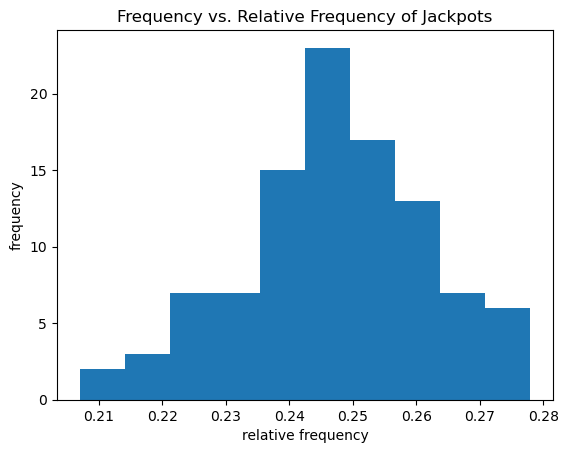

In [9]:
import matplotlib.pyplot as plt
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

In [10]:
analyzer = Analyzer(game_with_two_unfair_coins_and_one_fair_coin)
relative_frequency_for_one_fair_coin_and_two_unfair_coins = calculate_relative_frequency(analyzer, 1000)
relative_frequency_for_one_fair_coin_and_two_unfair_coins

0.355

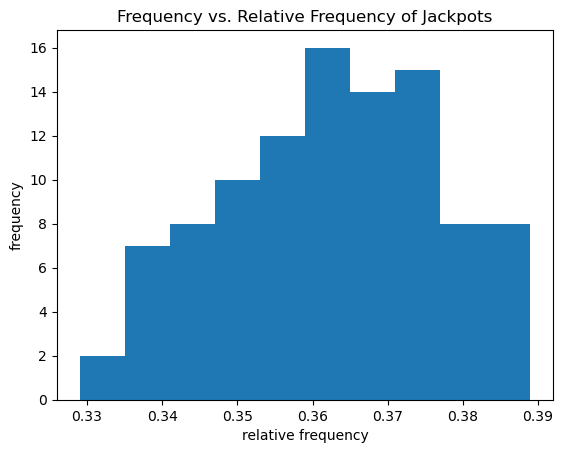

In [11]:
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

6.  Compare relative frequency of jackpots for a set of 3 fair coins and a set of 1 fair coin and 2 unfair coins.

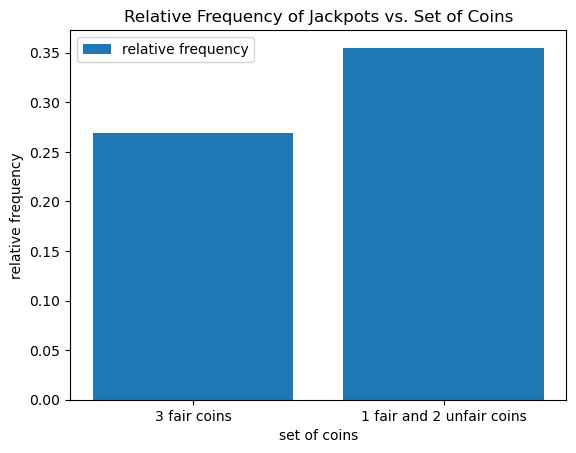

In [12]:
import matplotlib.pyplot as plt
plt.bar(x = ['3 fair coins', '1 fair and 2 unfair coins'], height = [relative_frequency_for_three_fair_coins, relative_frequency_for_one_fair_coin_and_two_unfair_coins], label = 'relative frequency')
plt.title('Relative Frequency of Jackpots vs. Set of Coins')
plt.xlabel('set of coins')
plt.ylabel('relative frequency')
plt.legend()
plt.show()

### Scenario 2: Rollng Six-Sided Dice

1. Create a fair die and two unfair dice, all of six sides with faces 1 through 6. One unfair die of Type 1 will weigh 6 five times more than the others; the weight of face 6 will be 5 and the weight of each other face will be 1. The other unfair die of Type 2 will weight 1 five times more than the others; the weight of face 1 will be 5 and the weight of each other face will be 1.

In [13]:
def generate_type_1_die():
    unfair_die_of_type_1 = Die(array_of_faces)
    unfair_die_of_type_1.change_weight(6, 5)
    return unfair_die_of_type_1
    
def generate_type_2_die():
    unfair_die_of_type_2 = Die(array_of_faces)
    unfair_die_of_type_2.change_weight(1, 5)
    return unfair_die_of_type_2

In [14]:
array_of_faces = np.array([1, 2, 3, 4, 5, 6], dtype = np.int8)
fair_die = Die(array_of_faces)
print(fair_die.show())
unfair_die_1 = generate_type_1_die()
print(unfair_die_1.show())
unfair_die_2 = generate_type_2_die()
print(unfair_die_2.show())

   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0
   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0
   face  weight
0     1     5.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0


2. Play a game of 10,000 rolls with 5 fair dice.

In [15]:
list_of_fair_dice = []
for i in range(0, 5):
    fair_die = Die(array_of_faces)
    list_of_fair_dice.append(fair_die)
game_with_five_fair_dice = Game(list_of_fair_dice)
game_with_five_fair_dice.play(10000)
game_with_five_fair_dice.show('wide')

,0,1,2,3,4
roll_index,,,,,
0,1,5,4,6,5
1,2,6,4,3,2
2,2,2,3,2,4
3,5,4,4,6,1
4,3,4,1,2,2
...,...,...,...,...,...
9995,5,4,5,4,4
9996,4,3,2,3,5
9997,6,1,4,6,5


3. Play a game of 10,000 rolls with 5 dice: 2 unfair dice of Type 1, 1 unfair die of Type 2, and the rest fair dice.

In [16]:
unfair_die_1 = generate_type_1_die()
unfair_die_2 = generate_type_1_die()
unfair_die_3 = generate_type_2_die()
fair_die_1 = Die(array_of_faces)
fair_die_2 = Die(array_of_faces)
list_of_unfair_and_fair_dice = [unfair_die_1, unfair_die_2, unfair_die_3, fair_die_1, fair_die_2]
game_with_unfair_and_fair_dice = Game(list_of_unfair_and_fair_dice)
game_with_unfair_and_fair_dice.play(10000)
game_with_unfair_and_fair_dice.show('wide')

,0,1,2,3,4
roll_index,,,,,
0,5,4,4,5,3
1,6,6,6,1,2
2,6,1,1,6,1
3,1,6,6,5,6
4,5,5,6,2,3
...,...,...,...,...,...
9995,6,6,6,5,6
9996,6,2,1,1,2
9997,6,2,4,2,1


4.  For each game, use an `Analyzer` object to determine the relative frequency of jackpots. A jackpot is a roll with all heads or all tails. Relative frequency is the ratio of the number of jackpots to the number of rolls. Show your results, comparing the two relative frequencies, in a simple bar chart.

    There are $6$ ways of rolling $5$ dice such that there are $5$ occurrences of one face: (1, 1, 1, 1, 1), (2, 2, 2, 2, 2), (3, 3, 3, 3, 3), (4, 4, 4, 4, 4), (5, 5, 5, 5, 5), and (6, 6, 6, 6, 6).
    
    There are $6$ ways of rolling $1$ die: 1, 2, 3, 4, 5, 6.
    
    There are $6^2$ ways of rolling $2$ dice.
    
    There are $6^5$ ways of rolling $5$ dice.
    
    The probability of rolling $5$ dice such that there are $5$ occurrences of one face
    $$P = \frac{number \ of \ favorable \ outcomes}{number \ of \ outcomes} = \frac{6}{6^5} = 0.000772$$

In [17]:
analyzer = Analyzer(game_with_five_fair_dice)
relative_frequency_for_five_fair_dice = calculate_relative_frequency(analyzer, 10000)
data_frame_of_face_combinations_and_counts_for_five_fair_dice = analyzer.generate_data_frame_of_face_combinations_and_counts().copy()
sorted_data_frame_of_face_combinations_and_counts_for_five_fair_dice = data_frame_of_face_combinations_and_counts_for_five_fair_dice.sort_values('count', ascending = False)
print(relative_frequency_for_five_fair_dice)

0.0006


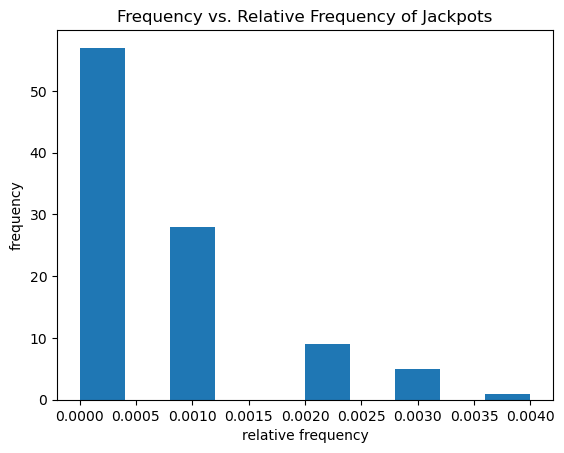

In [18]:
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

In [19]:
analyzer = Analyzer(game_with_unfair_and_fair_dice)
relative_frequency_for_unfair_and_fair_dice = calculate_relative_frequency(analyzer, 10000)
data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice = analyzer.generate_data_frame_of_face_combinations_and_counts().copy()
sorted_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice = data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice.sort_values('count', ascending = False)
print(relative_frequency_for_unfair_and_fair_dice)

0.0006


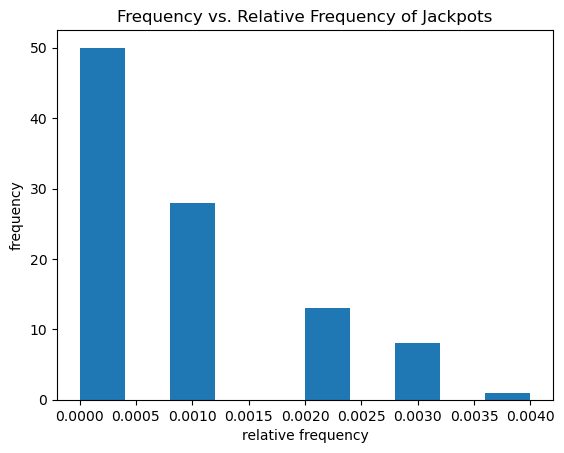

In [20]:
relative_frequencies = []
for i in range(0, 100):
    relative_frequency = calculate_relative_frequency(analyzer, 1000)
    relative_frequencies.append(relative_frequency)
plt.hist(relative_frequencies)
plt.title('Frequency vs. Relative Frequency of Jackpots')
plt.xlabel('relative frequency')
plt.ylabel('frequency')
plt.show()

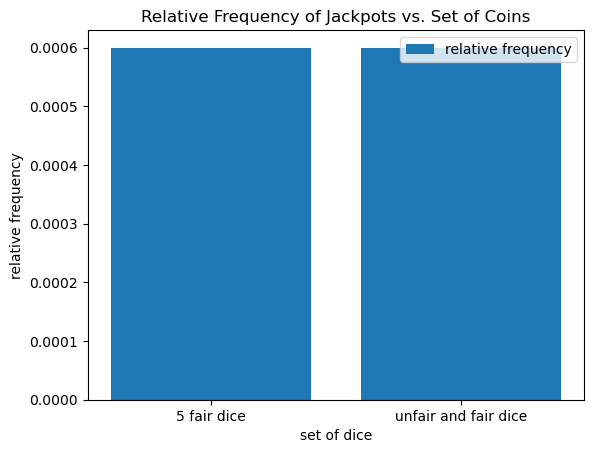

In [21]:
plt.bar(x = ['5 fair dice', 'unfair and fair dice'], height = [relative_frequency_for_five_fair_dice, relative_frequency_for_unfair_and_fair_dice], label = 'relative frequency')
plt.title('Relative Frequency of Jackpots vs. Set of Coins')
plt.xlabel('set of dice')
plt.ylabel('relative frequency')
plt.legend()
plt.show()

5. Compute the 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [22]:
head_of_data_frame_of_face_combinations_and_counts_for_five_fair_dice = sorted_data_frame_of_face_combinations_and_counts_for_five_fair_dice.head(n = 10)
print(head_of_data_frame_of_face_combinations_and_counts_for_five_fair_dice)

                         count
face face face face face      
1    2    3    4    6      165
                    5      161
2    3    4    5    6      157
1    2    3    5    6      155
     3    4    5    6      155
     2    4    5    6      142
3    4    5    5    6      100
1    2    2    4    5       96
2    4    5    5    6       95
     3    5    6    6       92


In [23]:
head_of_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice = sorted_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice.head(n = 10)
head_of_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice

count
face face face face face      
1    2    3    6    6      215
          4    6    6      209
     3    5    6    6      208
          4    6    6      199
     4    5    6    6      187
     2    5    6    6      185
          4    5    6      174
          3    5    6      173
     3    4    5    6      169
     2    3    4    6      169

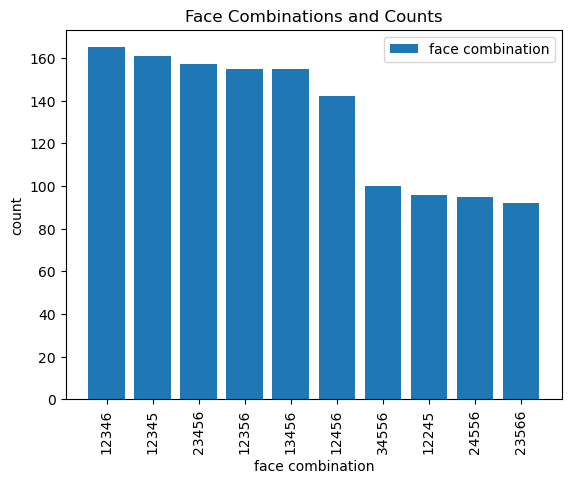

In [24]:
list_of_face_combinations = head_of_data_frame_of_face_combinations_and_counts_for_five_fair_dice.index.to_list()
list_of_collapsed_face_combinations = []
for i in range(0, len(list_of_face_combinations)):
    face_combination = list_of_face_combinations[i]
    collapsed_face_combination = ''
    for j in range(0, len(face_combination)):
        collapsed_face_combination += str(face_combination[j])
    list_of_collapsed_face_combinations.append(collapsed_face_combination)
list_of_collapsed_face_combinations
positions_of_collapsed_face_combinations = np.arange(0, len(list_of_collapsed_face_combinations))
list_of_counts = head_of_data_frame_of_face_combinations_and_counts_for_five_fair_dice['count'].to_list()
                                                     
plt.bar(x = positions_of_collapsed_face_combinations, height = list_of_counts, label = 'face combination')
plt.title('Face Combinations and Counts')
plt.xlabel('face combination')
plt.xticks(positions_of_collapsed_face_combinations, list_of_collapsed_face_combinations, rotation = 90)
plt.ylabel('count')
plt.legend()
plt.show()

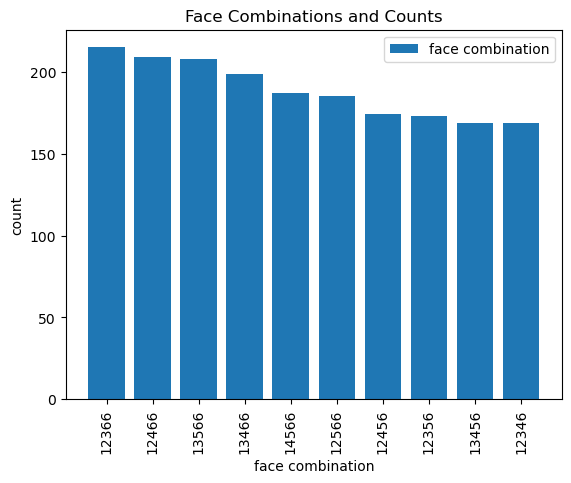

In [25]:
list_of_face_combinations = head_of_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice.index.to_list()
list_of_collapsed_face_combinations = []
for i in range(0, len(list_of_face_combinations)):
    face_combination = list_of_face_combinations[i]
    collapsed_face_combination = ''
    for j in range(0, len(face_combination)):
        collapsed_face_combination += str(face_combination[j])
    list_of_collapsed_face_combinations.append(collapsed_face_combination)
list_of_collapsed_face_combinations
positions_of_collapsed_face_combinations = np.arange(0, len(list_of_collapsed_face_combinations))
list_of_counts = head_of_data_frame_of_face_combinations_and_counts_for_unfair_and_fair_dice['count'].to_list()
                                                     
plt.bar(x = positions_of_collapsed_face_combinations, height = list_of_counts, label = 'face combination')
plt.title('Face Combinations and Counts')
plt.xlabel('face combination')
plt.xticks(positions_of_collapsed_face_combinations, list_of_collapsed_face_combinations, rotation = 90)
plt.ylabel('count')
plt.legend()
plt.show()

### Scenario 3: Generating English Words

1. Create a die of letters from 'A' to 'Z' with weights based on their frequency of usage. See 'Letters_and_Weights.txt' for a tab-separated data frame of letters and weights.

In [26]:
import pandas as pd

data_frame_of_letters_and_weights = pd.read_csv('scenarios/Letter_Weights.txt', delimiter = '\t', header = None).rename(columns = {0: 'letter', 1: 'weight'}).astype({'letter': str, 'weight': np.float64})
data_frame_of_letters_and_weights

,letter,weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


In [27]:
def generate_die():
    array_of_faces = np.array(data_frame_of_letters_and_weights['letter'], dtype = str)
    die = Die(array_of_faces)
    list_of_weights = data_frame_of_letters_and_weights['weight'].to_list()
    for i in range(0, len(array_of_faces)):
        face = array_of_faces[i]
        weight = list_of_weights[i]
        die.change_weight(face, weight)
        return die
    
die = generate_die()
die.show()

,face,weight
0,A,8.4966
1,B,1.0000
2,C,1.0000
3,D,1.0000
4,E,1.0000
5,F,1.0000
6,G,1.0000
7,H,1.0000
8,I,1.0000
9,J,1.0000


2. Play a game involving rolling 5 dice of letters from 'A' to 'Z' with weights based on their frequency of usage and 1000 rolls.

In [28]:
list_of_dice = []
for i in range(0, 5):
    die = generate_die()
    list_of_dice.append(die)
game = Game(list_of_dice)
game.play(1000)
data_frame_of_rolls_and_dice = game.show('wide')
data_frame_of_rolls_and_dice

,0,1,2,3,4
roll_index,,,,,
0,Z,F,A,Y,S
1,W,A,K,A,U
2,J,O,A,X,A
3,J,F,H,E,G
4,A,U,A,D,S
...,...,...,...,...,...
995,K,G,K,A,A
996,A,A,A,A,A
997,X,A,U,I,C


3. Generate 10 random samples of 10 rows each from the data frame of rolls and dice returned by the game showing a data frame of rolls and dice. Keep a running count; this will result in an estimate of the percent of English words in the data.

In [29]:
for i in range(0, 10):
    sample = data_frame_of_rolls_and_dice.sample(n = 10, replace = True, weights = None, random_state = None, axis = None, ignore_index = False)
    print(sample)
    print()

            0  1  2  3  4
roll_index               
636         A  X  Q  I  V
176         W  H  I  V  X
62          Z  A  I  U  L
973         D  E  B  N  Y
445         L  G  V  J  J
811         Q  T  Z  N  F
640         N  W  F  T  E
265         J  E  S  A  A
438         R  A  I  A  A
641         A  M  Y  G  A

            0  1  2  3  4
roll_index               
908         C  Y  D  A  A
285         S  X  W  V  A
790         A  A  A  R  J
516         V  Y  Q  P  Y
621         A  S  S  N  Q
105         A  A  A  E  J
508         A  K  T  A  A
437         M  A  V  A  U
682         U  A  A  Y  R
385         D  U  P  F  D

            0  1  2  3  4
roll_index               
260         V  A  U  W  T
457         H  S  B  A  Q
25          A  E  A  A  I
411         N  O  D  Y  O
623         B  A  W  M  S
727         V  V  A  M  A
906         K  W  J  A  K
440         A  X  A  Y  J
900         A  I  C  R  R
927         R  W  A  B  A

            0  1  2  3  4
roll_index               
756      

By inspection and comparison with Tom Lever's vocabulary, the number of English words in the samples is $0$. The estimated probability of a word in the samples being English
$$P = \frac{0}{100} = 0$$

## Directory Listing

In [30]:
!ls -l -R

total 5256
-rw-r--r--   1 tlever  staff       38 Nov 28 15:40 CHANGES.txt
-rw-r--r--   1 tlever  staff     1066 Nov 28 15:40 LICENSE
-rw-r--r--   1 tlever  staff    14955 Dec  1 20:53 README.md
drwxr-xr-x   4 tlever  staff      128 Dec  1 21:54 build
drwxr-xr-x   5 tlever  staff      160 Dec  1 20:53 demonstrations
-rw-r--r--   1 tlever  staff   195988 Dec  1 22:21 final-project-submission.ipynb
-rw-r--r--@  1 tlever  staff  2464833 Dec  1 22:14 final-project-submission.pdf
drwxr-xr-x   9 tlever  staff      288 Dec  1 21:53 montecarlosimulator
drwxr-xr-x   6 tlever  staff      192 Dec  1 22:18 montecarlosimulator.egg-info
drwxr-xr-x  11 tlever  staff      352 Dec  1 20:53 scenarios
-rw-r--r--   1 tlever  staff      684 Nov 28 15:40 setup.py
drwxr-xr-x   9 tlever  staff      288 Dec  1 21:40 test_modules

./build:
total 0
drwxr-xr-x  2 tlever  staff  64 Dec  1 22:18 bdist.macosx-10.9-x86_64
drwxr-xr-x  3 tlever  staff  96 Dec  1 21:34 lib

./build/bdist.macosx-10.9-x86_64:
total 0

./bu

## Installation Output Listing

In [31]:
!pip install .

Processing /Users/tlever/Documents/GitHub/montecarlosimulator
  Preparing metadata (setup.py) ... done
  Created wheel for montecarlosimulator: filename=montecarlosimulator-0.1.0-py3-none-any.whl size=12621 sha256=e011024f827a348693be20e0c52dd00ceb4e3feebd341c3e30786af7c2f47264
  Stored in directory: /private/var/folders/3n/yy40dngd6xd7n2qcdbz9_nq00000gn/T/pip-ephem-wheel-cache-0nd53gaj/wheels/de/98/8e/30a24bd8b39e840e77003f739a4a5000a85be1c678e7a152c3
Successfully built montecarlosimulator
  Attempting uninstall: montecarlosimulator
    Found existing installation: montecarlosimulator 0.1.0
    Uninstalling montecarlosimulator-0.1.0:
      Successfully uninstalled montecarlosimulator-0.1.0
